In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [25]:
Tesla_data = pd.read_csv('tesla.csv', dtype={'date_column': 'object'})
Tesla_data['Date'] = pd.to_datetime(Tesla_data['Date'],format='%d-%m-%Y')
Tesla_data.set_index('Date', inplace=True)
Tesla_data = Tesla_data.ffill()  

print(f'Dataframe contains stock prices between {Tesla_data.index.min()} and {Tesla_data.index.max()}')
print(f'Total days = {(Tesla_data.index.max() - Tesla_data.index.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 and 2019-03-15 00:00:00
Total days = 3181 days


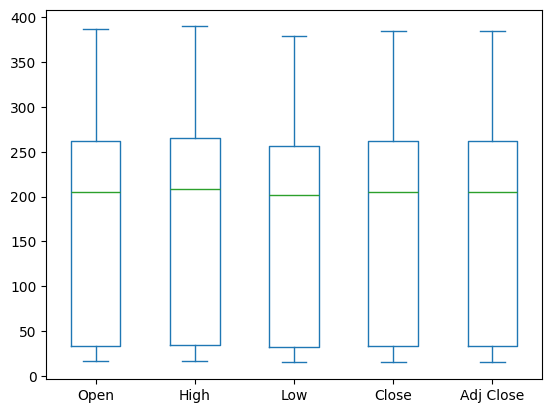

In [11]:
Tesla_data['Month'] = Tesla_data.index.month #feature scaling
Tesla_data['Day'] = Tesla_data.index.day
Tesla_data['Year'] = Tesla_data.index.year


Tesla_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box') #visualize data
plt.show()

In [12]:

layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(title='Date', titlefont=dict(family='Courier New, monospace', size=18, color='#7f7f7f')),    
    yaxis=dict(title='Price', titlefont=dict(family='Courier New, monospace', size=18, color='#7f7f7f'))
)
Tesla_data_data = [{'x': Tesla_data.index, 'y': Tesla_data['Close']}]
plot1 = go.Figure(data=Tesla_data_data, layout=layout)
plot(plot1)

'temp-plot.html'

In [13]:
X = Tesla_data[['Month', 'Day', 'Year']].values
Y = Tesla_data['Close'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

In [15]:
for name, model in models.items():
    model.fit(X_train, Y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    trace0 = go.Scatter(x=X_train[:, 1], y=Y_train, mode='markers', name='Actual')
    trace1 = go.Scatter(x=X_train[:, 1], y=train_pred, mode='lines', name='Predicted')
    plot2 = go.Figure(data=[trace0, trace1], layout=layout)
    plot(plot2)
    
    print(f'{name}:')
    print(f'Train R2: {r2_score(Y_train, train_pred)}')
    print(f'Test R2: {r2_score(Y_test, test_pred)}')
    print(f'Train MSE: {mse(Y_train, train_pred)}')
    print(f'Test MSE: {mse(Y_test, test_pred)}')
    print()

Linear Regression:
Train R2: 0.8676057339765406
Test R2: 0.8593929969382175
Train MSE: 1798.0437098359914
Test MSE: 1802.419734490161

Ridge Regression:
Train R2: 0.8676053263580337
Test R2: 0.8594173676722171
Train MSE: 1798.0492456942625
Test MSE: 1802.1073297667233

Lasso Regression:
Train R2: 0.8673581141017204
Test R2: 0.8607299674514016
Train MSE: 1801.4066300871748
Test MSE: 1785.2813133239292



In [16]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_model = grid_search.best_estimator_
print(f'Best Ridge Model: {best_model}')
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)
print(f'Tuned Ridge Train R2: {r2_score(Y_train, train_pred)}')
print(f'Tuned Ridge Test R2: {r2_score(Y_test, test_pred)}')

Best Ridge Model: Ridge(alpha=1)
Tuned Ridge Train R2: 0.8676053263580337
Tuned Ridge Test R2: 0.8594173676722171
